<a href="https://colab.research.google.com/github/shoutingraven369/Iris-Dataset/blob/main/Iris_Dataset_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score


In [8]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [24]:
df=pd.read_csv('Iris.csv')
df.drop(columns='Id',inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
encoder= LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


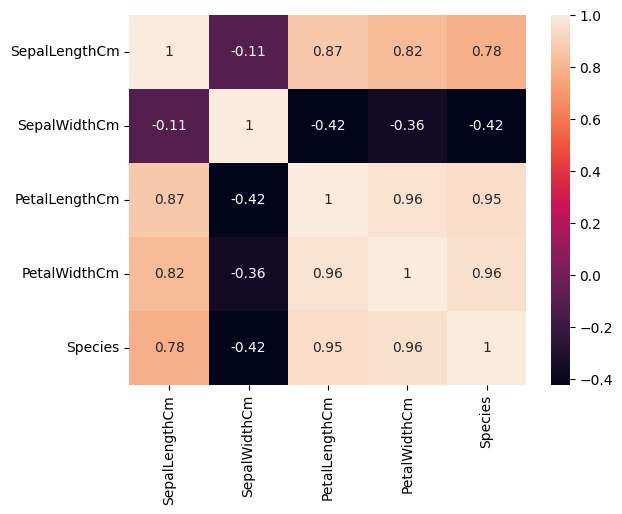

In [37]:
corr=df.corr()
sns.heatmap(corr,annot = True)
plt.show()

In [27]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(columns='Species'),df['Species'],test_size=.2,random_state=123)


# **Model Fitting**

In [31]:
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [32]:
y_pred=model.predict(X_test)

# ***Evaluation***

In [47]:
print("confusion matrix \n",confusion_matrix(y_test,y_pred))

confusion matrix 
 [[13  0  0]
 [ 0  5  1]
 [ 0  2  9]]


In [46]:
print("classification report \n",classification_report(y_test,y_pred))

classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.71      0.83      0.77         6
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.87      0.88      0.88        30
weighted avg       0.91      0.90      0.90        30



In [49]:
print("accuracy score: \n",accuracy_score(y_test,y_pred))

accuracy score: 
 0.9


90 percent accuracy

